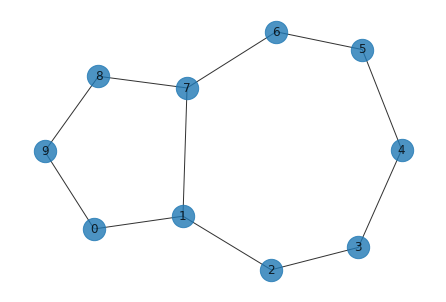

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
from qiskit.circuit import Parameter

from time import time
import networkx as nx

G = nx.Graph()
G.add_nodes_from([0,1,2,3,4,5,6,7,8,9])
G.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,5),(1, 7),(5,6),(6,7),(7,8),(8,9),(9,0)])
nx.draw(G, with_labels=True, alpha=0.8, node_size=500)

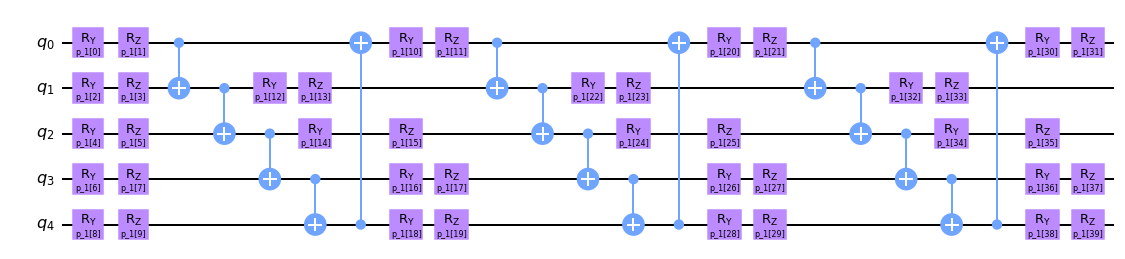

In [2]:
repeat = 4

qc_u1 = QuantumCircuit(5)
pv_u1 = ParameterVector('p_1', 10*repeat)

t = 0
for i in range(repeat):   
    qc_u1.ry(pv_u1[t], 0)
    qc_u1.rz(pv_u1[t+1],0)
    qc_u1.ry(pv_u1[t+2], 1)
    qc_u1.rz(pv_u1[t+3], 1)
    qc_u1.ry(pv_u1[t+4], 2)
    qc_u1.rz(pv_u1[t+5], 2)
    qc_u1.ry(pv_u1[t+6], 3)
    qc_u1.rz(pv_u1[t+7], 3)
    qc_u1.ry(pv_u1[t+8], 4)
    qc_u1.rz(pv_u1[t+9], 4)
    if i < repeat-1: 
        qc_u1.cnot(0,1)
        qc_u1.cnot(1,2)
        qc_u1.cnot(2,3)
        qc_u1.cnot(3,4)
        qc_u1.cnot(4,0)
    t += 10

qc_u1.draw(output="mpl")

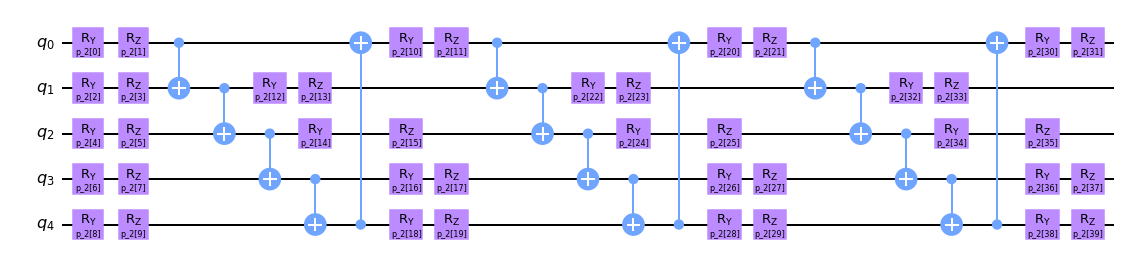

In [3]:
repeat = 4

qc_u2 = QuantumCircuit(5)
pv_u2 = ParameterVector('p_2', 10*repeat)

t = 0
for i in range(repeat):   
    qc_u2.ry(pv_u2[t], 0)
    qc_u2.rz(pv_u2[t+1],0)
    qc_u2.ry(pv_u2[t+2], 1)
    qc_u2.rz(pv_u2[t+3], 1)
    qc_u2.ry(pv_u2[t+4], 2)
    qc_u2.rz(pv_u2[t+5], 2)
    qc_u2.ry(pv_u2[t+6], 3)
    qc_u2.rz(pv_u2[t+7], 3)
    qc_u2.ry(pv_u2[t+8], 4)
    qc_u2.rz(pv_u2[t+9], 4)
    if i < repeat-1: 
        qc_u2.cnot(0,1)
        qc_u2.cnot(1,2)
        qc_u2.cnot(2,3)
        qc_u2.cnot(3,4)
        qc_u2.cnot(4,0)
    t += 10

qc_u2.draw(output="mpl")

In [4]:
def create_circ(G, theta):
    
    qc = QuantumCircuit(10)
#     qc.h(range(10))
    
    r = 4
    pv = ParameterVector('p',2*10*r)
    
    t = 0
    for i in range(r):   
        qc.ry(theta[t], 0)
        qc.rz(theta[t+1],0)
        qc.ry(theta[t+2], 1)
        qc.rz(theta[t+3], 1)
        qc.ry(theta[t+4], 2)
        qc.rz(theta[t+5], 2)
        qc.ry(theta[t+6], 3)
        qc.rz(theta[t+7], 3)
        qc.ry(theta[t+8], 4)
        qc.rz(theta[t+9], 4)
        if i < r-1: 
            qc.cnot(0,1)
            qc.cnot(1,2)
            qc.cnot(2,3)
            qc.cnot(3,4)
            qc.cnot(4,0)
        t += 10

    t = int(len(theta)/2)
    for i in range(r):   
        qc.ry(theta[t], 5)
        qc.rz(theta[t+1],5)
        qc.ry(theta[t+2], 6)
        qc.rz(theta[t+3], 6)
        qc.ry(theta[t+4], 7)
        qc.rz(theta[t+5], 7)
        qc.ry(theta[t+6], 8)
        qc.rz(theta[t+7], 8)
        qc.ry(theta[t+8], 9)
        qc.rz(theta[t+9], 9)
        if i < r-1: 
            qc.cnot(5,6)
            qc.cnot(6,7)
            qc.cnot(7,8)
            qc.cnot(8,9)
            qc.cnot(9,0)
        t += 10
    
    qc.measure_all()
    return qc

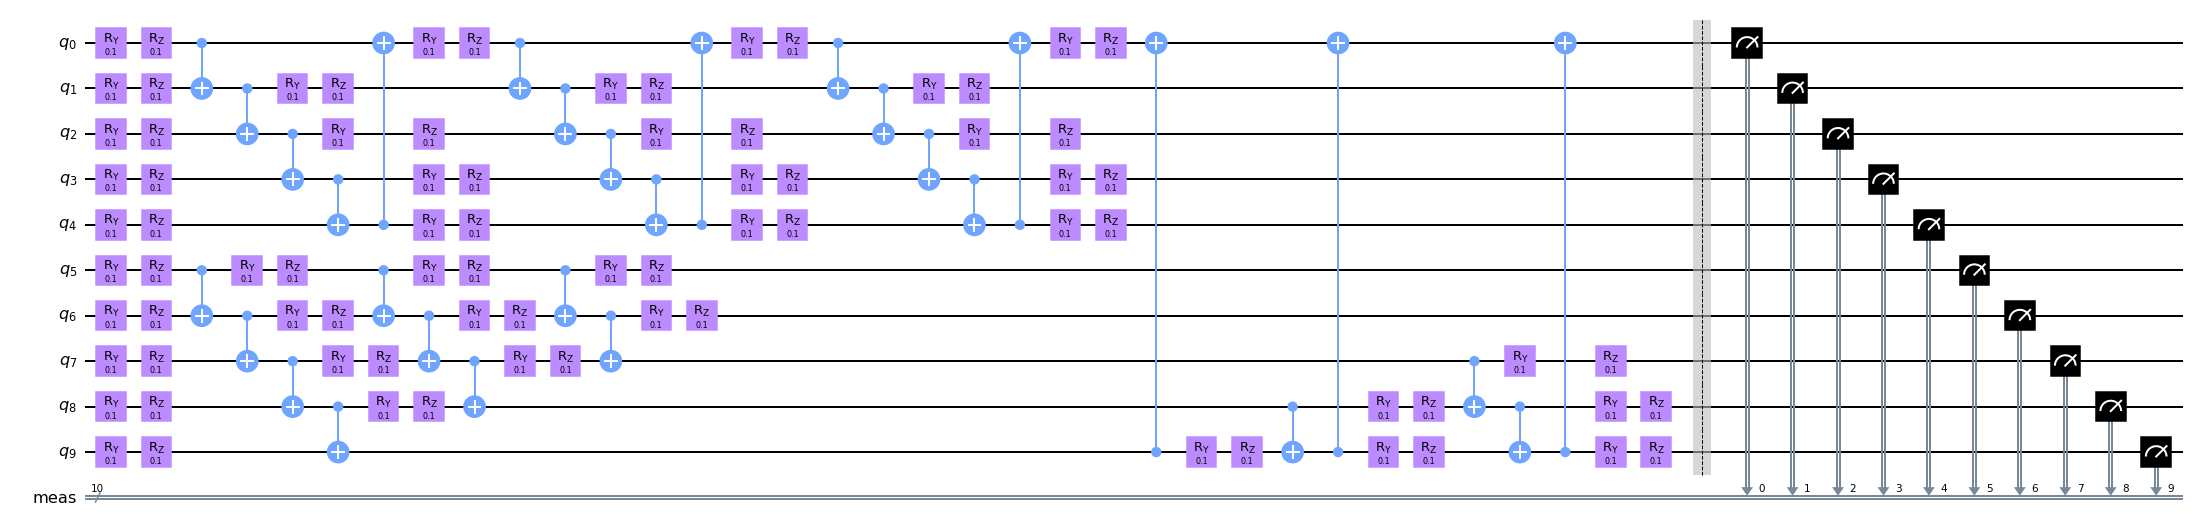

In [5]:
para = []
repeat = 4
for i in range(repeat*2*10): para.append(0.1)

qc_test = create_circ(G, para)

qc_test.draw(output="mpl", fold=-1)

In [6]:
def maxcut_obj(x, G):
    obj = 0
    for i, j in G.edges():
        if x[i] != x[j]:
            obj -= 1
            
    return obj

def compute_expectation(counts, G):
    
    avg = 0
    sum_count = 0
    for bitstring, count in counts.items():
        
        obj = maxcut_obj(bitstring, G)
        avg += obj * count
        sum_count += count
        
    return avg/sum_count

def get_expectation(G, p, shots=1024):
     
    backend = Aer.get_backend('qasm_simulator')
    backend.shots = shots
    
    def execute_circ(theta):
        
        qc = create_circ(G, theta)
        counts = backend.run(qc, seed_simulator=10, 
                             nshots=1024).result().get_counts()
        
        return compute_expectation(counts, G)
    
    return execute_circ

In [7]:
from scipy.optimize import minimize
start = time()
expectation = get_expectation(G, p=5)
res = minimize(expectation, 
              para, 
              method='COBYLA')
end = time()
print("Cost time:",end-start)
print(res)

Cost time: 24.991694927215576
     fun: -9.4150390625
   maxcv: 0.0
 message: 'Maximum number of function evaluations has been exceeded.'
    nfev: 1000
  status: 2
 success: False
       x: array([ 1.43989784,  0.01350488,  1.06213812, -0.01288315, -0.31363488,
        0.22556683,  1.55069581,  0.04193618,  0.11858131,  0.06815101,
        1.53382441,  0.20186509,  1.67006983,  0.1626358 ,  1.70832368,
       -0.05081118, -1.14561509, -0.01321902, -1.03031084,  0.0460928 ,
       -0.04944271, -0.88372167,  1.32466075,  0.49251841, -0.01635505,
        1.05890957,  1.44565561,  0.01348525, -0.47602484,  0.39146509,
       -0.10496398,  1.58312438,  0.04122164,  0.10446246, -0.06040179,
       -0.43259292,  0.02174662, -0.4531945 ,  0.12216966,  0.17292341,
        0.34181698, -0.40687317,  0.70300879,  0.3400938 ,  1.16626535,
        0.28215304,  0.69967904, -0.52388491, -0.21742842, -0.34603934,
        2.8321683 ,  0.20990928, -0.68721416,  0.10190726, -0.58780903,
       -0.1818145

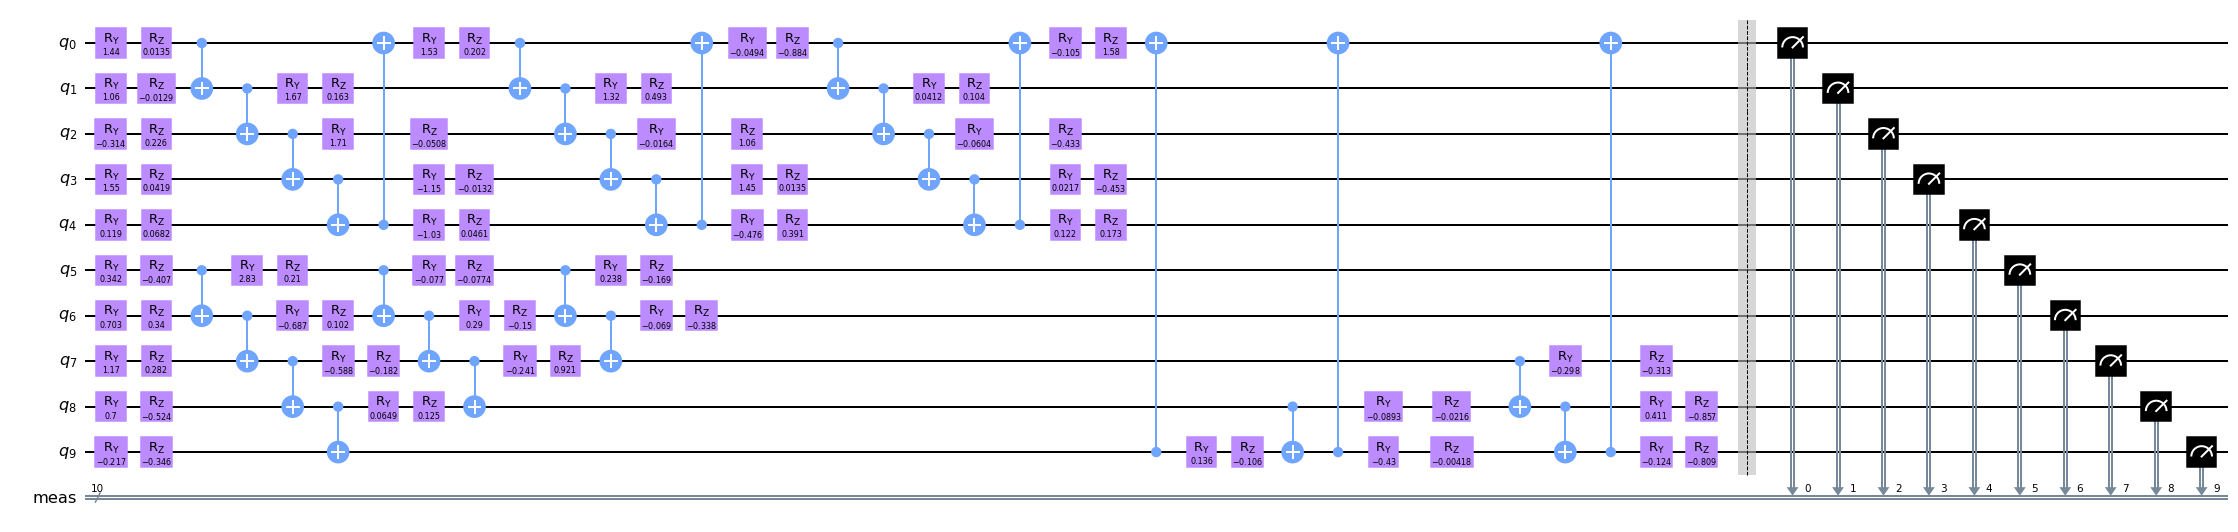

In [8]:
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('aer_simulator')
backend.shots = 1024

qc_res = create_circ(G, res.x)
qc_res.draw(output="mpl",fold=-1)

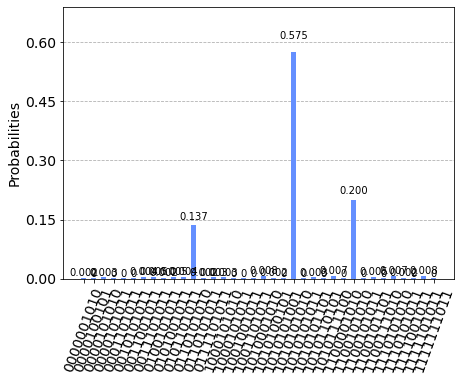

In [9]:
result = backend.run(qc_res, seed_simulator=10).result()
counts = result.get_counts()
plot_histogram(counts)

In [10]:
sort = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
print("Best 4 solutions:")
es = 0
for i in sort:
    print(i)
    es+=1
    if es == 4: break

Best 4 solutions:
1010101010
1100101010
0110101010
1010001010


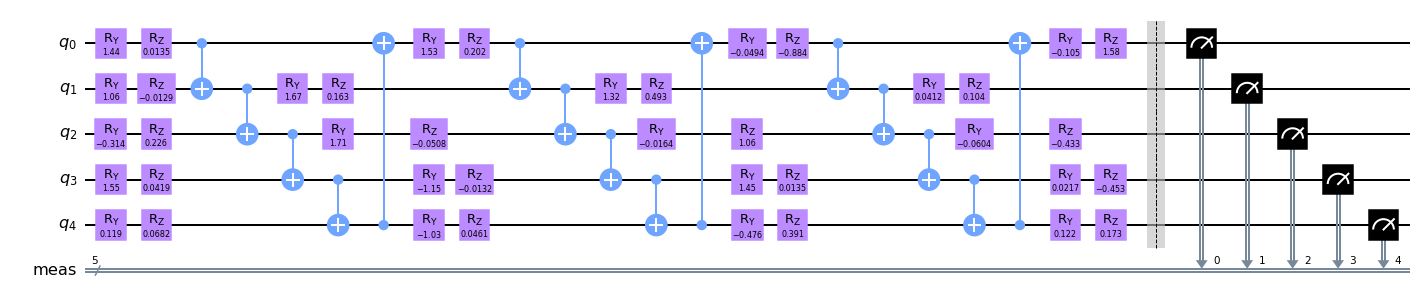

In [11]:
repeat = 4

qc_u1 = QuantumCircuit(5)
pv_u1 = ParameterVector('p_1', 10*repeat)

t = 0
for i in range(repeat):   
    qc_u1.ry(res.x[t], 0)
    qc_u1.rz(res.x[t+1],0)
    qc_u1.ry(res.x[t+2], 1)
    qc_u1.rz(res.x[t+3], 1)
    qc_u1.ry(res.x[t+4], 2)
    qc_u1.rz(res.x[t+5], 2)
    qc_u1.ry(res.x[t+6], 3)
    qc_u1.rz(res.x[t+7], 3)
    qc_u1.ry(res.x[t+8], 4)
    qc_u1.rz(res.x[t+9], 4)
    if i < repeat-1: 
        qc_u1.cnot(0,1)
        qc_u1.cnot(1,2)
        qc_u1.cnot(2,3)
        qc_u1.cnot(3,4)
        qc_u1.cnot(4,0)
    t += 10

qc_u1.measure_all()
qc_u1.draw(output="mpl", fold=-1)

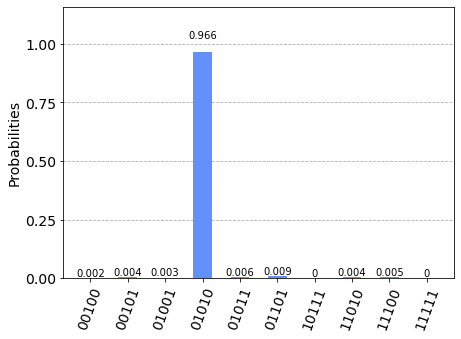

In [12]:
result = backend.run(qc_u1, seed_simulator=10).result()
counts = result.get_counts()
plot_histogram(counts)

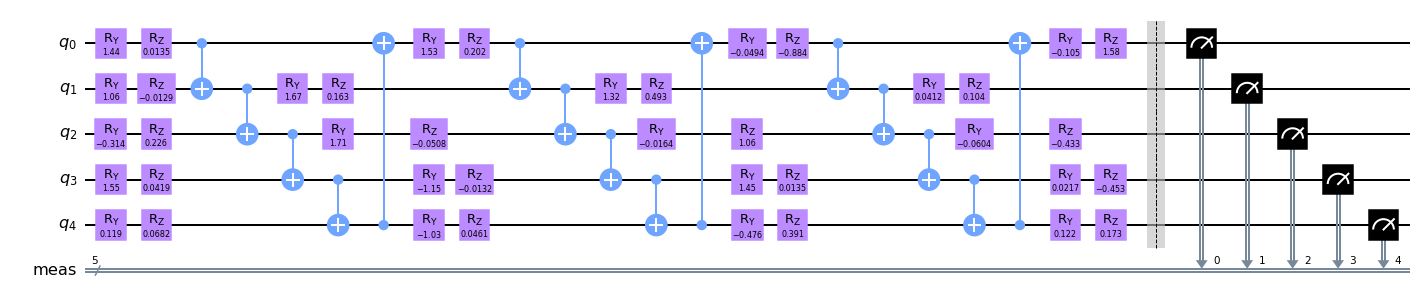

In [13]:
repeat = 4

qc_u2 = QuantumCircuit(5)
pv_u2 = ParameterVector('p_2', 10*repeat)

t = 0
for i in range(repeat):   
    qc_u2.ry(res.x[t], 0)
    qc_u2.rz(res.x[t+1],0)
    qc_u2.ry(res.x[t+2], 1)
    qc_u2.rz(res.x[t+3], 1)
    qc_u2.ry(res.x[t+4], 2)
    qc_u2.rz(res.x[t+5], 2)
    qc_u2.ry(res.x[t+6], 3)
    qc_u2.rz(res.x[t+7], 3)
    qc_u2.ry(res.x[t+8], 4)
    qc_u2.rz(res.x[t+9], 4)
    if i < repeat-1: 
        qc_u2.cnot(0,1)
        qc_u2.cnot(1,2)
        qc_u2.cnot(2,3)
        qc_u2.cnot(3,4)
        qc_u2.cnot(4,0)
    t += 10

qc_u2.measure_all()
qc_u2.draw(output="mpl",fold=-1)

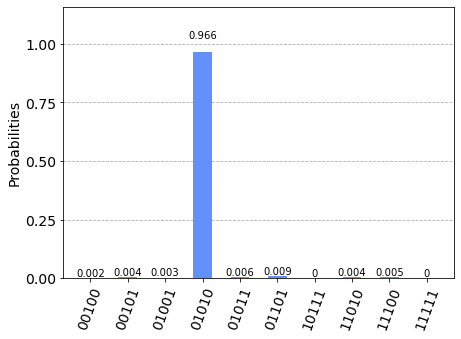

In [14]:
result = backend.run(qc_u2, seed_simulator=10).result()
counts = result.get_counts()
plot_histogram(counts)